In [1]:
from keras.datasets import boston_housing as bh
from keras.layers import Dense
from keras.models import Sequential
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# Getting data from the Keras datasets.
(X_train, y_train), (X_test, y_test) = bh.load_data()

# Much easier to convert the tensors to DataFrames through a function.
def to_df(array):
  array = pd.DataFrame(array).reset_index(drop=True)
  return array

# Changing the column names will be more scalable as well through a function.
def col_it(df, cnames):
  df.columns = cnames
  return df

# Input data points.
X_cols = ['crime', 'zon_25K', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'bk', 'ls']

# Output data.
y_col = ['medv']

57344/57026 [==============================] - 0s 0us/step


In [2]:
# Converting tensors to inputs.
X_train = to_df(X_train)
X_test = to_df(X_test)
y_train = to_df(y_train)
y_test = to_df(y_test)

# Renaming the columns.
X_train = col_it(X_train, X_cols)
X_test = col_it(X_test, X_cols)
y_train = col_it(y_train, y_col)
y_test = col_it(y_test, y_col)

In [3]:
# We are only really interested in comparing the number of rooms with the median value.
col_comp = pd.concat([X_train, y_train], axis=1)
col_comp = col_comp[['rm', 'medv']]

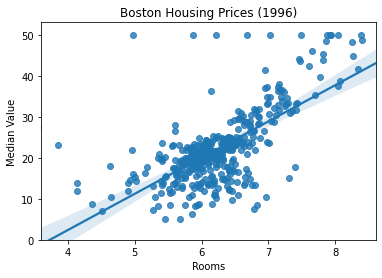

In [4]:
# Plotting the relationship, scatter with regression line.
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(data=col_comp, x="rm", y="medv")
plt.title("Boston Housing Prices (1996)")
plt.xlabel("Rooms")
plt.ylabel("Median Value")
plt.ylim(0,max(max(y_train['medv']), max(y_test['medv']) + 3))
plt.xlim(3.6,8.6)
plt.show()

In [5]:
# For ML, scaling the input data.
ss = StandardScaler().fit(X_train)
X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

In [6]:
# Model creation and fitting.
# Basically we are going to fit the data to the model and then the model will teach itself what to predict, becoming more accurate as it goes (we hope).
# Pretty cool.
model = Sequential()
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=80, batch_size=128, validation_split=0.2, verbose=0)

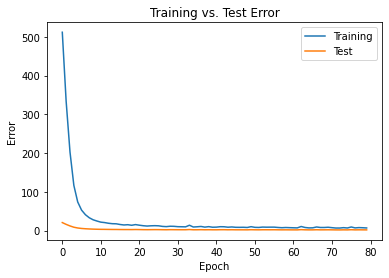

In [7]:
# A look at the training error (how well the model performs on training data), as well as test data (how well it performs on test data).
# As we can see, the training error stays pretty low, while the model went from being about $500 off to $3 off.
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['mae'], label='Test')
plt.title("Training vs. Test Error")
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.legend()
plt.show()

In [8]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print("Mean Average Error: %.2f" % (mae))

4/4 [==============================] - 0s 4ms/step - loss: 25.4982 - mae: 3.0941
Mean Average Error: 3.09
